# Segmentación de Clientes usando el Algoritmo K-means

En esta actividad, aplicaremos el algoritmo K-means para segmentar clientes de un centro comercial en función de su ingreso anual y puntaje de gasto.

In [1]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')


## 1. Carga y Exploración del Dataset

In [2]:

# Cargar los datos
data = pd.read_csv('data/Mall_Customers.csv')

# Mostrar las primeras filas
print(data.head())

# Información general del dataset
print(data.info())

# Seleccionar variables relevantes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## 2. Visualización Inicial de los Datos

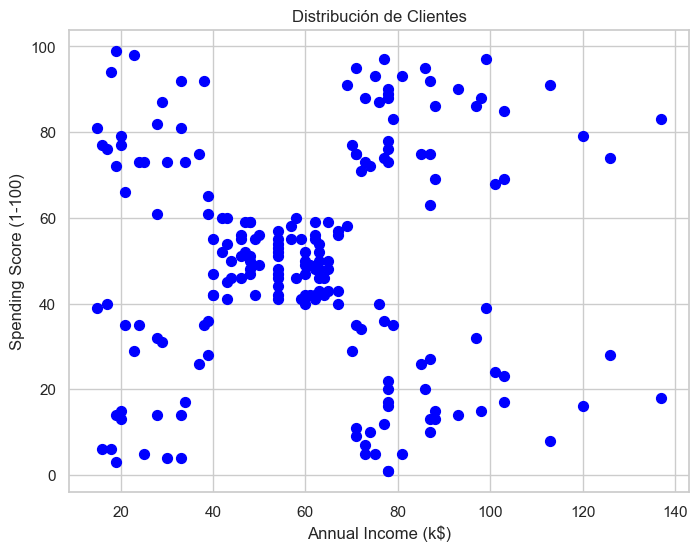

In [3]:

# Visualizar los datos iniciales
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', marker='o', s=50)
plt.title('Distribución de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## 3. Método del Codo para Determinar K

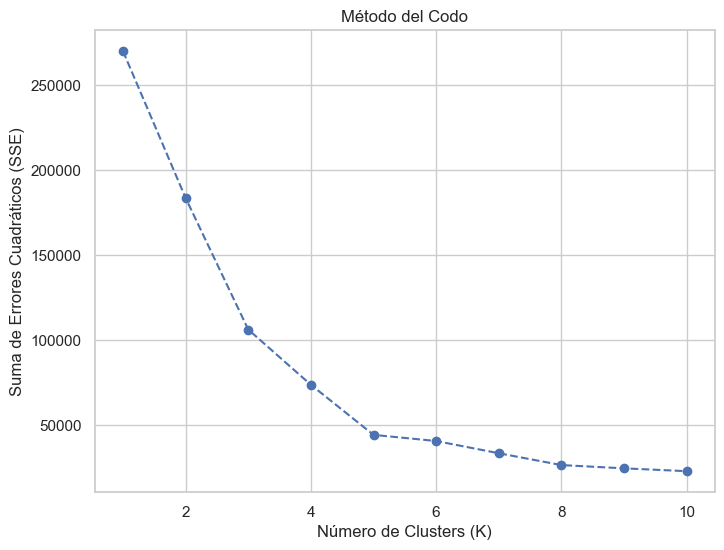

In [4]:

# Calcular el método del codo
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.show()


## 4. Implementación del Algoritmo K-means

/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_27383/1442963104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


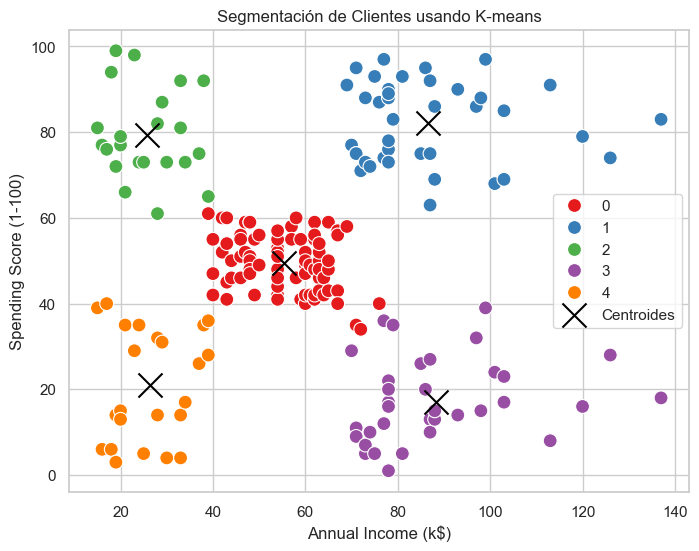

In [5]:

# Aplicar K-means con el número óptimo de clusters (por ejemplo, K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Agregar los clusters a los datos
X['Cluster'] = clusters

# Visualizar los clusters resultantes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=X, s=100, legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='x', label='Centroides')
plt.title('Segmentación de Clientes usando K-means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## 5. Interpretación de Resultados

In [6]:

# Mostrar las características de cada cluster
cluster_summary = X.groupby('Cluster').mean()
print(cluster_summary)

# Contar la cantidad de clientes por cluster
cluster_counts = X['Cluster'].value_counts()
print(cluster_counts)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


## Conclusión

El algoritmo K-means ha segmentado a los clientes en diferentes grupos basados en su ingreso anual y puntaje de gasto. Esta información puede ser utilizada para personalizar estrategias de marketing y mejorar la experiencia del cliente.